# Mental Wellness in the Tech Industry :

*a study by the Real Ricardo*

The data used in this notebook was downloaded from [Kaggle](https://www.kaggle.com/osmi/mental-health-in-tech-survey).
This analysis utilizes data from the comprehensive 2014 Mental Health in Tech survey, originally conducted by OSMI (https://osmihelp.org/).OSMI is a non-profit organization focused on promoting mental wellness awareness and providing resources within the tech and open-source sectors


**Below is a description of data in the survey: It includes the type of quetions asked.**

| Column  | Description  |
|---|---|
| Timestamp  | Date survey was filled  |
| Gender  | Gender identity of surveyed person  |
| Country  | Country of residence  |
| State  | US residents only  |
| self_employed  | Are you self-employed?   |
| family_history  | Do you have a family history of mental illness?  |
| treatment  | Have you sought treatment for a mental health condition?  |
| work_interfere  | If you have a mental health condition, do you feel that it interferes with your work?  |
| no_employees  | How many employees does your company or organization have?  |
| remote_work  | Do you work remotely (outside of an office) at least 50% of the time?  |
| tech_company  | Is your employer primarily a tech company/organization?  |
| benefits  | Does your employer provide mental health benefits?  |
| care_options  | Do you know the options for mental health care your employer provides?  |
| wellness_program  | Has your employer ever discussed mental health as part of an employee wellness program?  |
| seek_help  | Does your employer provide resources to learn more about mental health issues and how to seek help?  |
| anonymity  | Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?  |
| leave  | How easy is it for you to take medical leave for a mental health condition?  |
| mental_health_consequence  | Do you think that discussing a mental health issue with your employer would have negative consequences?  |
| phys_health_consequence  | Do you think that discussing a physical health issue with your employer would have negative consequences?  |
| coworkers  | Would you be willing to discuss a mental health issue with your coworkers?  |
| supervisors  | Would you be willing to discuss a mental health issue with your direct supervisor(s)?  |
| mental_health_interview  | Would you bring up a mental health issue with a potential employer in an interview?  |
| mental_vs_physical  | Do you feel that your employer takes mental health as seriously as physical health?  |
| obs_consequence  | Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?  |
| comments  | Any additional notes or comments?  |

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# choosing color palette
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

## 1. Data Cleaning

In [2]:
# load data into pandas dataframe and explore columns and first rows
survey = pd.read_csv('survey.csv')
survey.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
# renaming columns to have all lowercase
survey.columns = [col.lower() for col in survey.columns]

#If we look here all data types are object except for age which is int.
print(survey.dtypes)

timestamp                    object
age                           int64
gender                       object
country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object


- Cleaning the Survey Data: What We Did and Why

Removing Useless Columns:
We did not use  several columns that wouldn't help the analysis:

Location data (Timestamp, Country, State): The data for specific regions was sparse, so trying to analyze it by region would give unreliable results.

Text comments (comments): Removed this field to focus purely on the structured, quantifiable data.

In [4]:
survey.drop(['timestamp', 'state', 'comments', 'country'], axis= 1, inplace= True)

In [5]:
#Fixing and Validating Age 
#after finding some weird responses in the age column ('such as 99999999 and -1729')
# i decided to only include 'valid' numbers for age
survey['age'] = survey['age'].apply(lambda x: x if 0 < x < 100 else np.nan)

In [6]:
# first lower case and strip eveything to decrease options
survey['gender'] = survey['gender'].apply(lambda x: x.lower().strip())

# based on the replies made these lists :
male = ['male', 'm', 'make', 'cis male', 'man', 'cis man', 'msle', 'malr', 'mail', 'maile', 'something kinda male?', 'ostensibly male, unsure what that really means', 'male-ish', 'guy (-ish) ^_^', 'mal', 'male (cis)']
female = ['female', 'f', 'woman', 'female (cis)', 'cis-female/femme', 'femake', 'cis female', 'femail']

def regender(gender_input):
    
    """
    Input: a string about gender
    Output: male, female or other depending on our dictionary
    
    """ 
    if gender_input in male:
        return 'male'
    elif gender_input in female:
        return 'female'
    else:
        return 'other'
    
survey['gender'] = survey['gender'].apply(regender)

# check the final results
survey.gender.value_counts(dropna= False)

gender
male      994
female    247
other      18
Name: count, dtype: int64

In [7]:
# checking for nans
nan_cols = []
for col in survey.columns:
    if survey[col].isnull().sum():
        print(col + ' (%): ' + str(sum(survey[col].isnull())/len(survey)))
        nan_cols += [col]

# nans are present in the self-employed column and in the work_interfere column.
# at most there are 20% of values with nans so we'll replace with 'Don't know'
for col in nan_cols:
    survey[col].fillna("Don't know", inplace= True)

#It is better to drop the rows without age.
survey = survey[survey.age != "Don't know"]

# in the context of our aim, we need to drop everyone who is self-employed
print(survey['self_employed'].value_counts())
survey.loc[survey['self_employed'] == 'Yes'] = np.nan
survey.dropna(inplace=True)

age (%): 0.003971405877680699
self_employed (%): 0.014297061159650517
work_interfere (%): 0.2096902303415409
self_employed
No            1092
Yes            144
Don't know      18
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_6052\763136699.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Don't know' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  survey[col].fillna("Don't know", inplace= True)


- **To effectively analyze the remaining columns, we should first identify which ones are binary/categorical (like Yes/No, or a few options) and then inspect the unique values for each of those columns.**


In [8]:
# unique answers for every column
exclude = ['age']
possible_answers = {col:[i for i in survey[col].unique()] for col in survey.columns if col not in exclude}
possible_answers

{'gender': ['female', 'male', 'other'],
 'self_employed': ["Don't know", 'No'],
 'family_history': ['No', 'Yes'],
 'treatment': ['Yes', 'No'],
 'work_interfere': ['Often', 'Rarely', 'Never', 'Sometimes', "Don't know"],
 'no_employees': ['6-25',
  'More than 1000',
  '26-100',
  '100-500',
  '1-5',
  '500-1000'],
 'remote_work': ['No', 'Yes'],
 'tech_company': ['Yes', 'No'],
 'benefits': ['Yes', "Don't know", 'No'],
 'care_options': ['Not sure', 'No', 'Yes'],
 'wellness_program': ['No', "Don't know", 'Yes'],
 'seek_help': ['Yes', "Don't know", 'No'],
 'anonymity': ['Yes', "Don't know", 'No'],
 'leave': ['Somewhat easy',
  "Don't know",
  'Somewhat difficult',
  'Very difficult',
  'Very easy'],
 'mental_health_consequence': ['No', 'Maybe', 'Yes'],
 'phys_health_consequence': ['No', 'Yes', 'Maybe'],
 'coworkers': ['Some of them', 'No', 'Yes'],
 'supervisor': ['Yes', 'No', 'Some of them'],
 'mental_health_interview': ['No', 'Yes', 'Maybe'],
 'phys_health_interview': ['Maybe', 'No', 'Yes']

- **There are many answers with maybeand not sure ,so normalizing all 'half-answers' to 'Don't know', so changing 'Not sure' and 'Maybes'**


In [9]:
def replace_uncertainty(survey_answer):
    """
    Uniformizes all uncertain answers.
    Input: half-answer (string)
    Output: 'Don't know'
    
    """
    
    uncertainty = ['Maybe', 'Some of them', 'Not sure']
    if survey_answer in uncertainty:
        return "Don't know"
    else:
        return survey_answer

# apply function to all columns
for col in survey.columns:
    survey[col] = survey[col].apply(replace_uncertainty)

- **the column 'care_options' asks the question: "Do you know the options for mental health care your employer provides?" and about 30% of the answers are 'Dont know'.** 
- **Based on what i think: if the answer to a question 'Do you know?' is 'I don't know' - then it implies No.**

In [10]:
survey['care_options'] = survey['care_options'].replace(to_replace="Don't know", value= 'No')
survey['care_options'].value_counts()

care_options
No     730
Yes    380
Name: count, dtype: int64

## 2. Exploratory Data Analysis

**Here , we are applying an agnostic analysis and just make a correlation matrix bewteen all the variables to find out relationship between variables and patterns.**

1. The first thing is encoding all the answers as numbers.


In [11]:
# create a dictionary to map out all the answers in the survey
encoding_dict = {'No': -1, "Don't know": 0, 'Yes': 1,
                 'Never': -2, 'Rarely': -1, 'Sometimes': 1, 'Often': 2,
                 'Very difficult': -2, 'Somewhat difficult': -1, 'Somewhat easy': 1, 'Very easy': 2,
                 '1-5': 0, '6-25': 1, '26-100': 2, '100-500': 3, '500-1000': 4, 'More than 1000': 5,
                 'male': -1, 'other': 0, 'female': 1}

In [12]:
# made a copy just to check values
survey_coded = survey.copy()

# for each column except the ones not excluded change the values in our dictionary
for col in survey_coded.columns:
    if col not in exclude:
        survey_coded[col] = survey_coded[col].map(encoding_dict)

In [13]:
# let's take a look at our encoded dataframe.
survey_coded

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37.0,1,0,-1,1,2,1,-1,1,1,...,1,1,-1,-1,0,1,-1,0,1,-1
1,44.0,-1,0,-1,-1,-1,5,-1,-1,0,...,0,0,0,-1,-1,-1,-1,-1,0,-1
2,32.0,-1,0,-1,-1,-1,1,-1,1,-1,...,0,-1,-1,-1,1,1,1,1,-1,-1
3,31.0,-1,0,1,1,2,2,-1,1,-1,...,-1,-1,1,1,0,-1,0,0,-1,1
4,31.0,-1,0,-1,-1,-2,3,1,1,1,...,0,0,-1,-1,0,1,1,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26.0,-1,-1,-1,1,0,2,-1,1,-1,...,0,1,-1,-1,0,0,-1,-1,0,-1
1255,32.0,-1,-1,1,1,2,2,1,1,1,...,1,-1,-1,-1,0,1,-1,-1,1,-1
1256,34.0,-1,-1,1,1,1,5,-1,1,1,...,0,-1,1,1,-1,-1,-1,-1,-1,-1
1257,46.0,1,-1,-1,-1,0,3,1,1,-1,...,0,0,1,-1,-1,-1,-1,-1,-1,-1


In [14]:
# make the correlation matrix
correlation = survey_coded.corr()

<Axes: >

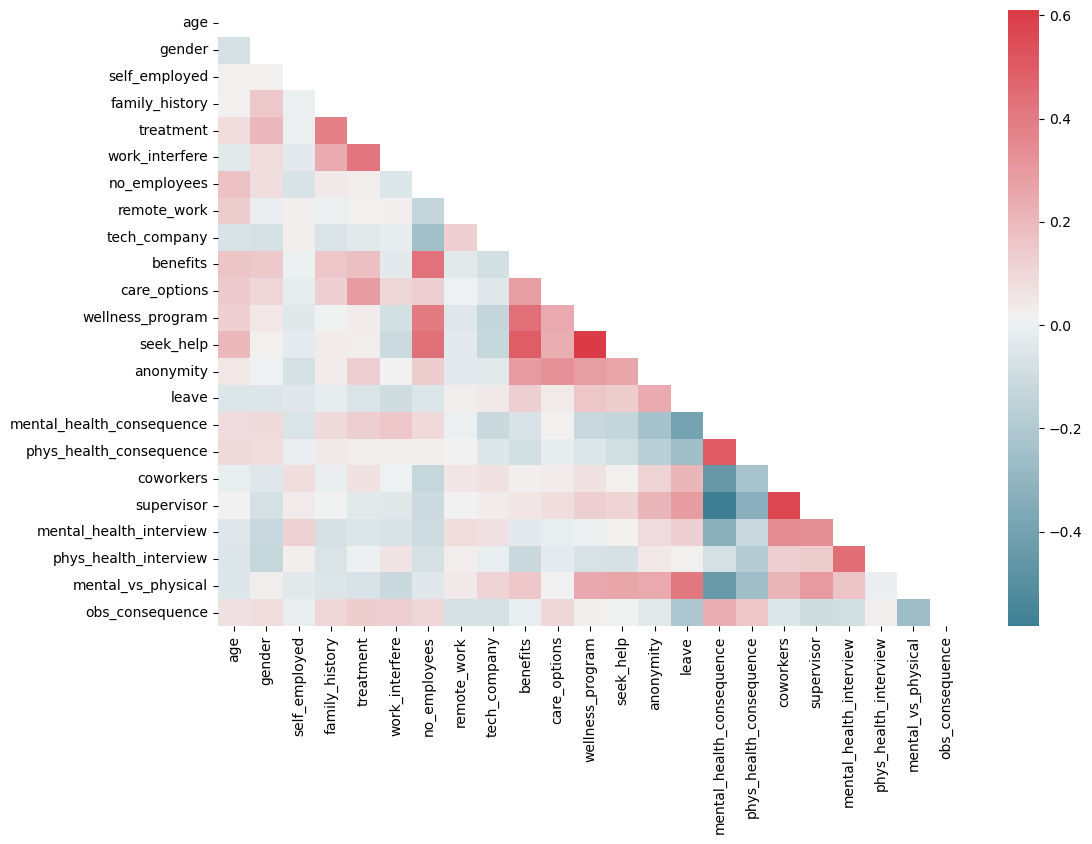

In [16]:
# making a mask to only show half the table cause its duplicated.
mask = np.triu(np.ones_like(correlation, dtype=np.bool_))

# choosing colors
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, cmap=cmap, mask=mask, annot= False)

- **There are way too many variables. It's hard to consider what is important or not.**

So, it would be better to use-
## 3. Hypothesis-driven analysis

**To create a score for the willingness to speak, we combined all the columns that ask 'If you're willing to speak to someone about mental health**

**Following the same logic, I combined all the columns that ask about services provided by the company**

We combined these columns by adding them together, it was important to make sure they all 'move in the same direction'
The result of this are two columns:
1. 'workplace_resources', ranges from −6 to 6 and represents the company-level metric of support.
2. 'willingness': ranges from −3 to 3 and serves as the employee-level metric of openness. 

In [17]:
# define columns to combine
workplace_resources = ['benefits', 
                      'wellness_program', 
                      'anonymity', 
                      'seek_help', 
                      'leave']

willingness = ['coworkers',
               'supervisor',
               'mental_health_interview']

# add columns together
survey_coded['workplace_resources'] = survey_coded.benefits + survey_coded.wellness_program + survey_coded.seek_help + survey_coded.leave + survey_coded.anonymity
survey_coded['willingness'] = survey_coded.coworkers + survey_coded.supervisor + survey_coded.mental_health_interview

In [35]:
# to plot a histogram

def pretty_histogram(data, colname, label, save= False):
    
    """
    Input: data (pandas dataframe), column name (str), x label (str), save (bool)
    Output: a pretty histogram
    """

    hist = sns.distplot(data[colname], 
                        bins = data[colname].max() - data[colname].min() + 1,
                        kde= False,
                        color=flatui[-2],
                        hist_kws= {'range': (data[colname].min(), data[colname].max()),
                                   'rwidth': 0.95,
                                   'alpha': 1})
    
    hist.set(xlabel= label, ylabel= 'Count')
    sns.despine()
    
    if save:
        figure = hist.get_figure()
        figure.savefig('figures/' + colname + "_hist.png")
    

C:\Users\Admin\AppData\Local\Temp\ipykernel_6052\927601156.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  hist = sns.distplot(data[colname],


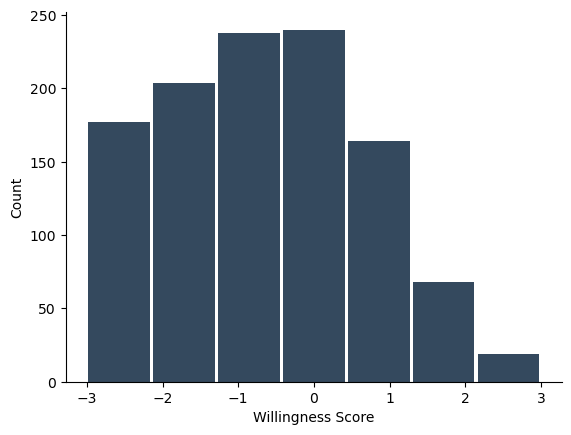

In [36]:
# make a histogram for 'Willingness' variable.
pretty_histogram(survey_coded, 'willingness', 'Willingness Score', save= False)

**This looks like a right skewed distribution, meaning that the majority of people are unwilling to talk about mental health in their work environment.**

C:\Users\Admin\AppData\Local\Temp\ipykernel_6052\927601156.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  hist = sns.distplot(data[colname],


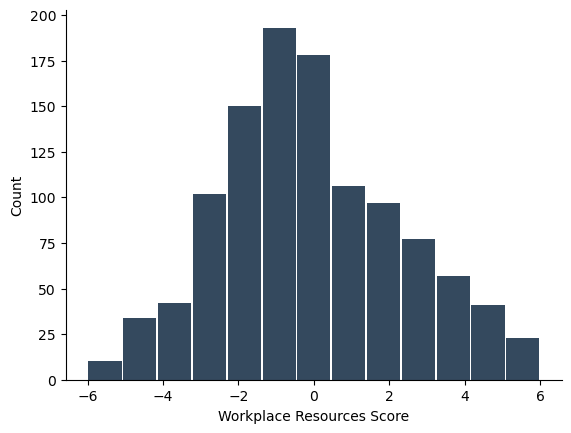

In [20]:
# make a histogram for 'Workplace Resources' variable
pretty_histogram(survey_coded, 'workplace_resources', 'Workplace Resources Score', save= True)

**This one looks more normally distributed but still centered left of the zero, meaning that the majority of companies don't have many mental health resources**

In [21]:
# interestingly to check the proportion of people aware of services to recode the values in the
# care options column from 'No' = -1 to 'No' = 0
survey_coded['care_options'].replace(to_replace=-1, value=0, inplace= True)
survey_coded.pivot_table(index=['workplace_resources'], values=['care_options'], aggfunc= lambda x: sum(x)/len(x))

,care_options
workplace_resources,
-6,0.400000
-5,0.441176
-4,0.333333
-3,0.215686
-2,0.180000
-1,0.176166
0,0.252809
1,0.377358
2,0.432990


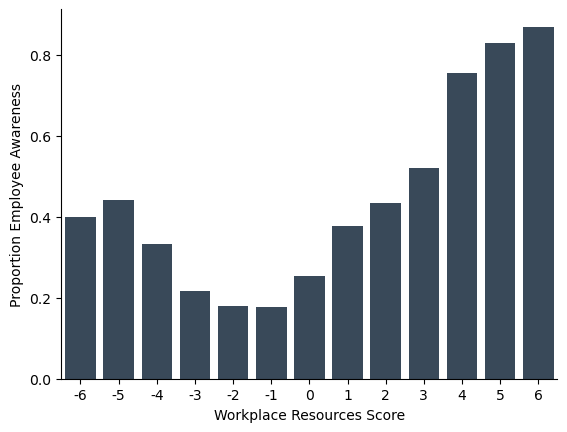

In [32]:
# plot proportions of people that know about care options for each score of workplace resource.

label = 'Workplace Resources Score'

bars = sns.barplot(x='workplace_resources', y='care_options', data= survey_coded, 
                   errorbar= None, color= flatui[4])

bars.set(xlabel= label, ylabel= 'Proportion Employee Awareness')
sns.despine()
figure = bars.get_figure()
figure.savefig('figures/resources_and_awareness.png')

- **One possible interpretation here  is that the more services are available, more people know about them, and where there's none people ALSO know that.**

In [23]:
# group by variable of interest, create a label and rename columns
family_data = survey_coded.groupby('family_history').agg({'willingness':'mean'}).reset_index()
family_data['label'] = ['Family History']*len(family_data)
family_data.rename(columns= {'family_history':'Answer'}, inplace=True)

treatment_data = survey_coded.groupby('treatment').agg({'willingness':'mean'}).reset_index()
treatment_data['label'] = ['Treatment']*len(treatment_data)
treatment_data.rename(columns= {'treatment':'Answer'}, inplace=True)

willingness_variables = pd.concat([family_data, treatment_data], axis=0)
willingness_variables.Answer.replace(to_replace=-1, value='No', inplace=True)
willingness_variables.Answer.replace(to_replace=1, value='Yes', inplace=True)

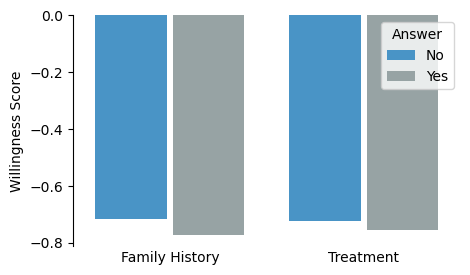

In [24]:
# making a category bar plot
fig, ax = plt.subplots(figsize=(5, 3))

bars= sns.barplot(x="label", y="willingness", hue="Answer", 
            palette= sns.color_palette(flatui[1:3]), 
            data=willingness_variables)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)


change_width(ax, .37)
sns.despine(bottom=True)
bars.set(xlabel= '', ylabel= 'Willingness Score')
bars.tick_params(axis='x', which='both', length=0)
figure = bars.get_figure()
figure.savefig('figures/history_treatment_willingness.png')

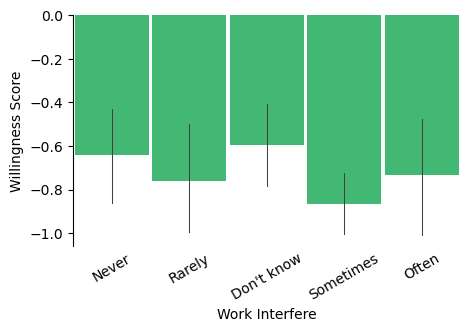

In [25]:
xlabel = 'Work Interfere'
ylabel = 'Willingness Score'

fig, ax = plt.subplots(figsize=(5, 3))
bars = sns.barplot(x= 'work_interfere', y= 'willingness', data= survey_coded, color= flatui[-1], errwidth=0.75)

bars.set(xlabel= xlabel, ylabel= ylabel, xticklabels=['Never', 'Rarely', "Don't know", 'Sometimes', 'Often'])
bars.set_xticklabels(['Never', 'Rarely', "Don't know", 'Sometimes', 'Often'], rotation=30)
bars.set()
sns.despine(bottom= True)
change_width(ax, .95)
bars.tick_params(axis='x', which='both', length=0)

figure = bars.get_figure()
figure.savefig('figures/work_interfere_willingness.png')

In [26]:
# gender willingness might not be useful
gender_willingness = survey_coded.groupby('gender').agg({'willingness':'mean'})
gender_willingness

,willingness
gender,
-1,-0.659404
0,-0.615385
1,-1.053333


- Women are less likely to open up about mental health . If we consider that tech is a male-dominated industry where perhaps climbing up the ladder as a woman is significantly harder , this makes sense.

In [27]:
willingness_treatment = survey_coded.groupby('workplace_resources').agg({'willingness':'mean'})
willingness_treatment

,willingness
workplace_resources,
-6,-2.600000
-5,-1.323529
-4,-1.000000
-3,-1.333333
-2,-0.820000
-1,-0.782383
0,-0.752809
1,-0.641509
2,-0.453608


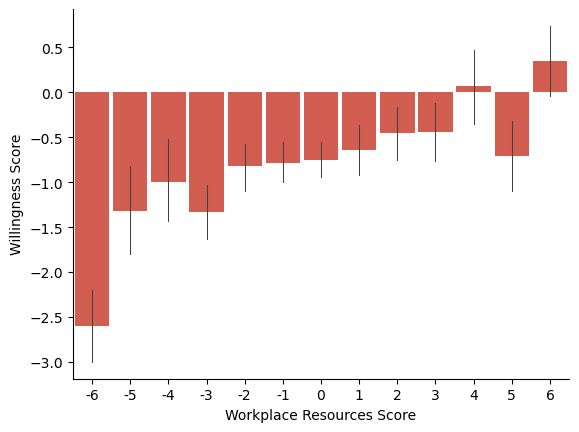

In [28]:
# create a bar plot with the average willingness score for each workplace resourses category
xlabel = 'Workplace Resources Score'
ylabel = 'Willingness Score'

fig, ax = plt.subplots()
bars = sns.barplot(x='workplace_resources', y='willingness', data= survey_coded, 
                   color= flatui[3], errwidth=0.75)

bars.set(xlabel= xlabel, ylabel= ylabel)
sns.despine()
change_width(ax, .9)
figure = bars.get_figure()
figure.savefig('figures/resources_willingness.png')

- **To see if this connection is real and measurable, we took the raw data and performed a linear regression.In simple terms, we built a simple mathematical model to find out if we can accurately predict a person's "willingness score" just by knowing how many "workplace resources" their company provides.**

In [29]:
# linear regression
x = survey_coded['workplace_resources']
y = survey_coded['willingness']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
print ('The r_value is: ' + str(r_value**2))
print ('The std error is: ' + str(std_err))
print(p_value)

The slope is: 0.1253597181423454
The intercept is: -0.7280097538526822
The r_value is: 0.044725026501352225
The std error is: 0.01740512006838772
1.090037487724972e-12


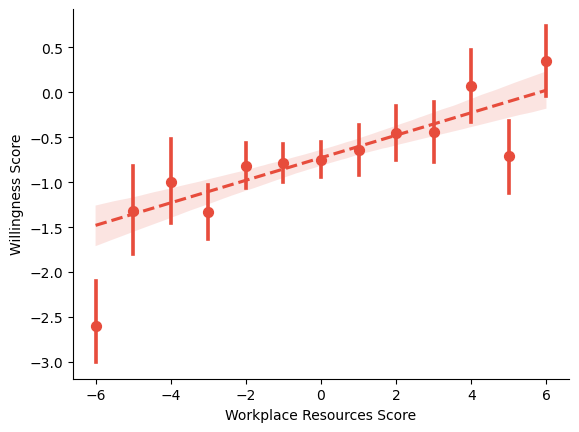

In [31]:

xlabel = 'Workplace Resources Score'
ylabel = 'Willingness Score'

reg = sns.regplot(x=x, y=y, x_estimator=np.mean,
                  scatter_kws={'color':flatui[3]},
                  line_kws = {'color':flatui[3],
                              'ls':'dashed'})

reg.set(xlabel= xlabel, ylabel= ylabel)
sns.despine()
figure = reg.get_figure()
figure.savefig('figures/resources_willingness_regplot.png')

- **The Connection is Weak: Our test didn't show a strong link between company resources and a person's willingness score. BUT!**
- **Why It Still Matters: Even though this is a small effect—it doesn't explain much of the overall change—we shouldn't ignore it. When dealing with something complex like mental health behavior, lots of tiny factors are at play.**